In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
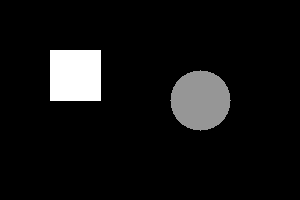

In [2]:
# --- Crear una imagen principal y una plantilla simples ---
# Imagen principal (más grande)
main_image = np.zeros((200, 300), dtype=np.uint8)
# Añadir algunas formas
cv2.rectangle(main_image, (50, 50), (100, 100), 255, -1) # Cuadrado blanco
cv2.circle(main_image, (200, 100), 30, 150, -1) # Círculo gris

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
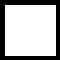

In [3]:
# Imagen de plantilla (más pequeña, el cuadrado blanco que queremos encontrar)
template = np.zeros((60, 60), dtype=np.uint8)
cv2.rectangle(template, (5, 5), (55, 55), 255, -1) # Cuadrado blanco para buscar

In [4]:
# Obtener dimensiones de la plantilla
# OpenCV usa (ancho, alto) para las formas pero shape devuelve (alto, ancho)
h, w = template.shape # Obtener alto y ancho
# w, h = template.shape[::-1] # Alternativa para obtener ancho, alto directamente

In [5]:
# --- Realizar Template Matching (Coincidencia de Plantilla) ---
# Usar el método TM_CCOEFF_NORMED para una coincidencia robusta
# Existen otros métodos: TM_SQDIFF, TM_CCORR_NORMED, etc.
res = cv2.matchTemplate(main_image, template, cv2.TM_CCOEFF_NORMED)

In [6]:
# --- Encontrar la ubicación de la mejor coincidencia ---
# Encontrar la ubicación con el puntaje de correlación máximo
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

In [7]:
# max_loc da la esquina superior izquierda del área coincidente
top_left = max_loc
# Calcular la esquina inferior derecha sumando el ancho y alto de la plantilla
bottom_right = (top_left[0] + w, top_left[1] + h)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
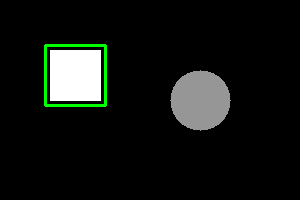

In [8]:
# --- Dibujar un rectángulo alrededor del área coincidente en la imagen principal ---
# Crear una copia a color para dibujar el rectángulo en color
main_image_color = cv2.cvtColor(main_image, cv2.COLOR_GRAY2BGR)
cv2.rectangle(main_image_color, top_left, bottom_right, (0, 255, 0), 2) # Rectángulo verde, grosor 2

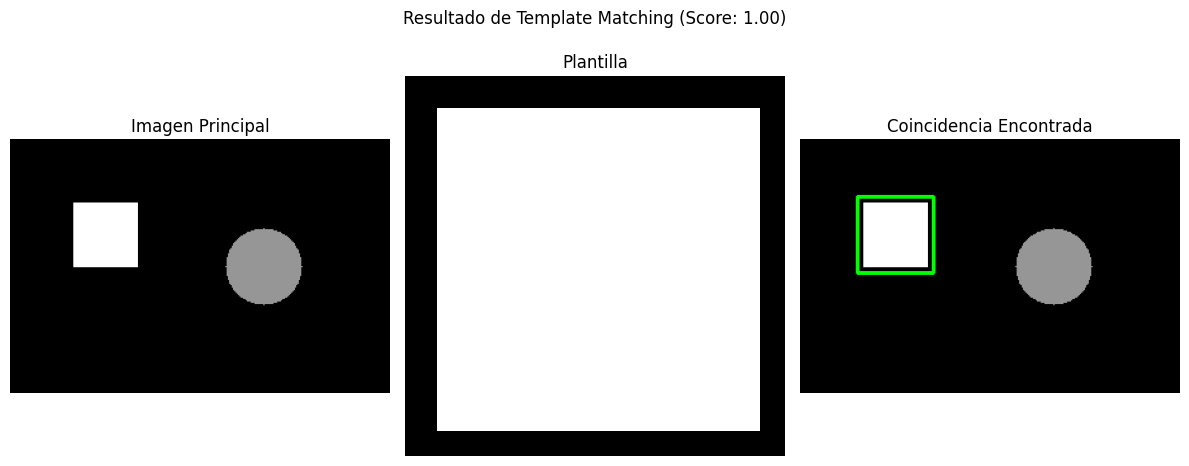

In [9]:
# --- Mostrar los resultados usando Matplotlib ---
plt.figure(figsize=(12, 5)) # Ajustar tamaño de la figura

plt.subplot(131) # Primera subfigura (1 fila, 3 columnas, posición 1)
plt.imshow(main_image, cmap='gray')
plt.title('Imagen Principal')
plt.axis('off') # Ocultar ejes

plt.subplot(132) # Segunda subfigura
plt.imshow(template, cmap='gray')
plt.title('Plantilla')
plt.axis('off')

plt.subplot(133) # Tercera subfigura
plt.imshow(cv2.cvtColor(main_image_color, cv2.COLOR_BGR2RGB)) # Convertir BGR a RGB para Matplotlib
plt.title('Coincidencia Encontrada')
plt.axis('off')

# Título general para la figura
plt.suptitle(f'Resultado de Template Matching (Score: {max_val:.2f})')
plt.tight_layout() # Ajustar espaciado
plt.show() # Mostrar la figura

In [11]:
# Imprimir información en la consola
print(f"Plantilla encontrada en la posición (esquina superior izquierda): {top_left}")
print(f"Máximo score de correlación: {max_val:.4f}")

Plantilla encontrada en la posición (esquina superior izquierda): (45, 45)
Máximo score de correlación: 1.0000


In [ ]:
# Explicación:
# - Creamos una imagen principal y una imagen de plantilla más pequeña.
# - `cv2.matchTemplate` desliza la plantilla sobre la imagen principal y calcula un puntaje de similitud en cada posición.
# - `cv2.minMaxLoc` encuentra la posición donde el puntaje de similitud es más alto (para TM_CCOEFF_NORMED).
# - Dibujamos un rectángulo en esa posición para mostrar la coincidencia.
# - Usamos Matplotlib para mostrar la imagen original, la plantilla y el resultado lado a lado.